import necessary libraries for the simulation

In [1]:
import numpy as np
from numpy import random

from prosstt import tree
from prosstt import simulation as sim

set random seed for reproducability

In [2]:
rseed = 4
random.seed(rseed)

simulate a default tree and normalize the expression matrix by library size

In [3]:
t = tree.Tree()
X, pseudotimes, branch, scalings = sim.sample_whole_tree_restricted(t)

# normalize gene expression by library size
X = (X.transpose() / scalings).transpose()

/home/npapado/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


calculate the diffusion map of the normalized expression matrix

In [4]:
import anndata as ad
from scanpy.api.tl import diffmap

data = ad.AnnData(X)
diffmap(adata=data)
dm = data.obsm["X_diffmap"]

plot the diffusion map colored according to the branch assignment and pseudotime of each cell

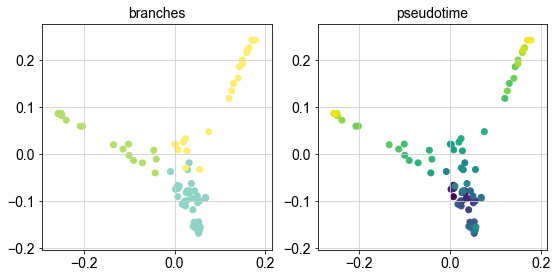

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# make sure to use viridis as the default color map
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'viridis'

# translate the branch assignment of each cell to a number
br_names, indices = np.unique(branch, return_inverse=True)

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(w=9, h=4)
ax[0].scatter(dm[:, 0], dm[:, 1], c=indices, cmap="Set3")
ax[0].set_title("branches")

# dark blue is the beginning, yellow is the end
ax[1].scatter(dm[:, 0], dm[:, 1], c=pseudotimes, cmap="viridis")
ax[1].set_title("pseudotime")